In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 운영 체제 정보를 확인하고, matplotlib을 사용하여 그래프 그릴 준비하기
import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"

from matplotlib import font_manager, rc
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Sorry')

plt.rcParams['axes.unicode_minus'] = False

In [5]:
tf.random.set_seed(42)

# 인코더 모델 정의
encoder = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_shape=(3,))  # 입력 형상 정의. 이 예에서는 입력 데이터가 (3,)형상이라고 가정.
])

# 디코더 모델 정의
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=(2,))  # 디코더의 입력 형상도 정의.
])
autoencoder = tf.keras.Sequential([encoder, decoder])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)
autoencoder.compile(loss="mse", optimizer=optimizer)

In [6]:
# 3D 데이터셋 생성.

import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # 3D 데이터 세트 초기화
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # 고르지 않은 분포
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # 타원형
X += 0.28 * np.random.randn(m, 3)  # 노이즈 추가
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X_train = X + [0.2, 0, 0.2]  # 약간 이동

In [7]:
history = autoencoder.fit(X_train, X_train, epochs=500, verbose=False)
codings = encoder.predict(X_train)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


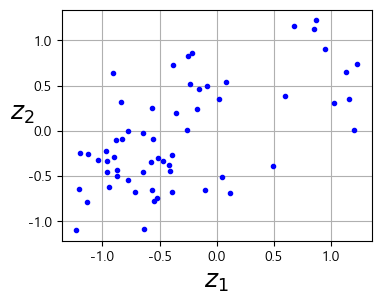

In [9]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

In [6]:
# 패션 MNIST 데이터셋 로드, 스케일링 및 분할
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [14]:
tf.random.set_seed(42)  

stacked_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
])
stacked_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])
stacked_ae = tf.keras.Sequential([stacked_encoder, stacked_decoder])

stacked_ae.compile(loss="mse", optimizer="nadam")
history = stacked_ae.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0333 - val_loss: 0.0177
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0170 - val_loss: 0.0162
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0159 - val_loss: 0.0156
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0153 - val_loss: 0.0152
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0150 - val_loss: 0.0149
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0147 - val_loss: 0.0147
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0145 - val_loss: 0.0145
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0143 - val_loss: 0.0144
Epoch 9/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0141 - val_loss: 0.0142
Epoch 10/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0140 - val_loss: 0.0141
Epoch 11/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0139 - val_loss: 0.0140
Epoch 12/20
1719/1719 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


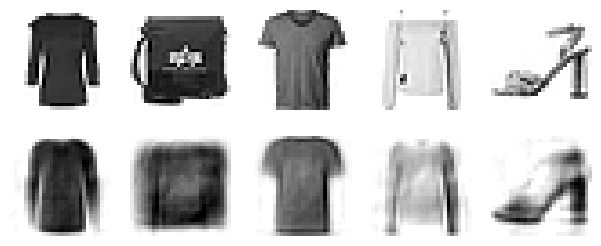

In [15]:
def plot_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = np.clip(model.predict(images[:n_images]), 0, 1)
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index], cmap="binary")
        plt.axis("off")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstructions[image_index], cmap="binary")
        plt.axis("off")

plot_reconstructions(stacked_ae)
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step


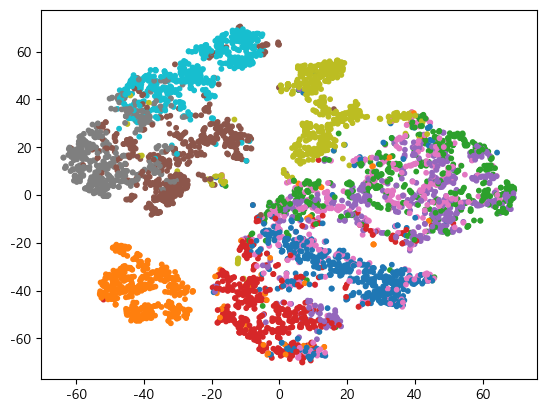

In [17]:
from sklearn.manifold import TSNE
X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE(init='pca', learning_rate='auto', random_state=42)
X_valid_2D = tsne.fit_transform(X_valid_compressed)

# 산점도 시각화
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap='tab10')
plt.show()

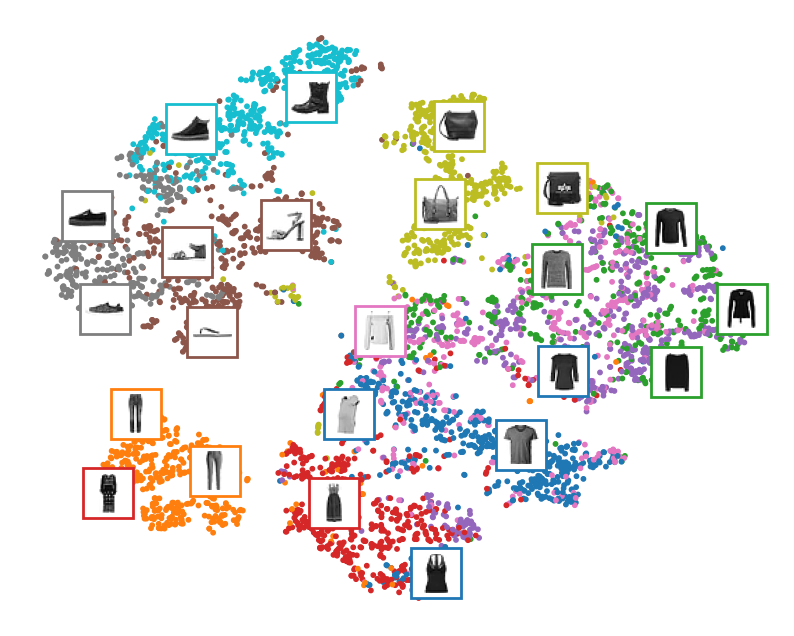

In [19]:
import matplotlib as mpl

plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
Z = X_valid_2D
Z = (Z - Z.min()) / (Z.max() - Z.min())  # 0-1 범위로 정규화
plt.scatter(Z[:, 0], Z[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(Z):
    dist = ((position - image_positions) ** 2).sum(axis=1)
    if dist.min() > 0.02: # 다른 이미지와 충분히 멀리 떨어져 있는 경우
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)

plt.axis("off")
plt.show()

In [76]:
class DenseTranspose(tf.keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.dense = dense
        self.activation = tf.keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias",
                                      shape=self.dense.input_shape[-1],
                                      initializer="zeros")
        super().build(batch_input_shape)

    def call(self, inputs):
        Z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(Z + self.biases)

In [77]:
tf.random.set_seed(42)

dense_1 = tf.keras.layers.Dense(100, activation="relu")
dense_2 = tf.keras.layers.Dense(30, activation="relu")

tied_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    dense_1,
    dense_2
])

tied_decoder = tf.keras.Sequential([
    DenseTranspose(dense_2, activation="relu"),
    DenseTranspose(dense_1),
    tf.keras.layers.Reshape([28, 28])
])

tied_ae = tf.keras.Sequential([tied_encoder, tied_decoder])

# 모델을 컴파일하고 훈련
tied_ae.compile(loss="mse", optimizer="nadam")
history = tied_ae.fit(X_train, X_train, epochs=10,
                      validation_data=(X_valid, X_valid))

AttributeError: 'Dense' object has no attribute 'input_shape'

In [78]:
def train_autoencoder(n_neurons, X_train, X_valid, n_epochs=10,
                      output_activation=None):
    n_inputs = X_train.shape[-1]
    encoder = tf.keras.layers.Dense(n_neurons, activation="relu")
    decoder = tf.keras.layers.Dense(n_inputs, activation=output_activation)
    autoencoder = tf.keras.Sequential([encoder, decoder])
    autoencoder.compile(loss="mse", optimizer="nadam")
    autoencoder.fit(X_train, X_train, epochs=n_epochs,
                    validation_data=(X_valid, X_valid))
    return encoder, decoder, encoder(X_train), encoder(X_valid)

In [79]:
tf.random.set_seed(42)

X_train_flat = tf.keras.layers.Flatten()(X_train)
X_valid_flat = tf.keras.layers.Flatten()(X_valid)
enc1, dec1, X_train_enc1, X_valid_enc1 = train_autoencoder(
    100, X_train_flat, X_valid_flat)
enc2, dec2, _, _ = train_autoencoder(
    30, X_train_enc1, X_valid_enc1, output_activation="relu")

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0301 - val_loss: 0.0114
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0108 - val_loss: 0.0101
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0100 - val_loss: 0.0098
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0098 - val_loss: 0.0096
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0093 - val_loss: 0.0091
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0092 - val_loss: 0.0090
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0091 - val_loss: 0.0090
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0090 - val_loss: 0.0089
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1099 - val_loss: 0.0347
Epoch 2/10
1719/1719 ━━━━━━━━━━

In [80]:
stacked_ae_1_by_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    enc1, enc2, dec2, dec1,
    tf.keras.layers.Reshape([28, 28])
])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


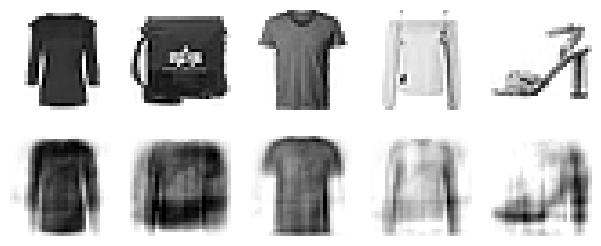

In [81]:
plot_reconstructions(stacked_ae_1_by_1)
plt.show()

In [84]:
tf.random.set_seed(42) 

conv_encoder = tf.keras.Sequential([
    tf.keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    tf.keras.layers.Conv2D(16, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),  # 출력: 14 × 14 x 16
    tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),  # 출력: 7 × 7 x 32
    tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),  # 출력: 3 × 3 x 64
    tf.keras.layers.Conv2D(30, 3, padding="same", activation="relu"),
    tf.keras.layers.GlobalAvgPool2D()  # 출력: 30
])
conv_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(3 * 3 * 16),
    tf.keras.layers.Reshape((3, 3, 16)),
    tf.keras.layers.Conv2DTranspose(32, 3, strides=2, activation="relu"),
    tf.keras.layers.Conv2DTranspose(16, 3, strides=2, padding="same",
                                    activation="relu"),
    tf.keras.layers.Conv2DTranspose(1, 3, strides=2, padding="same"),
    tf.keras.layers.Reshape([28, 28])
])
conv_ae = tf.keras.Sequential([conv_encoder, conv_decoder])

# 모델을 컴파일하고 훈련.
conv_ae.compile(loss="mse", optimizer="nadam")
history = conv_ae.fit(X_train, X_train, epochs=10,
                      validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 0.0460 - val_loss: 0.0209
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0196 - val_loss: 0.0180
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0171 - val_loss: 0.0164
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0157 - val_loss: 0.0155
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0147 - val_loss: 0.0147
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0140 - val_loss: 0.0142
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0135 - val_loss: 0.0136
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0132 - val_loss: 0.0133
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0128 - val_loss: 0.0132
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0126 - val_loss: 0.0131


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


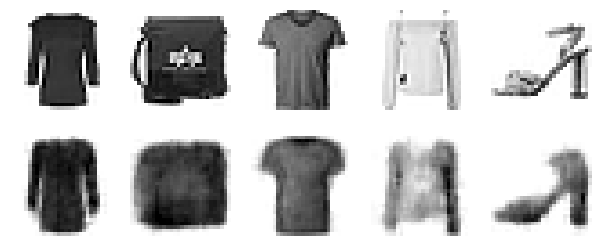

In [85]:
plot_reconstructions(conv_ae)
plt.show()

In [86]:
# 드롭아웃 사용
tf.random.set_seed(42)

dropout_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu")
])
dropout_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])
dropout_ae = tf.keras.Sequential([dropout_encoder, dropout_decoder])

# 모델을 컴파일하고 훈련.
dropout_ae.compile(loss="mse", optimizer="nadam")
history = dropout_ae.fit(X_train, X_train, epochs=10,
                         validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0396 - val_loss: 0.0215
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0225 - val_loss: 0.0198
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0211 - val_loss: 0.0188
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0202 - val_loss: 0.0182
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0197 - val_loss: 0.0177
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0193 - val_loss: 0.0176
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0190 - val_loss: 0.0172
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0188 - val_loss: 0.0171
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0186 - val_loss: 0.0169
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0185 - val_loss: 0.0168


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


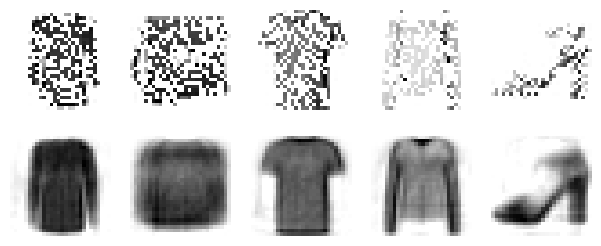

In [88]:
tf.random.set_seed(42)
dropout = tf.keras.layers.Dropout(0.5)
plot_reconstructions(dropout_ae, dropout(X_valid, training=True))
plt.show()

In [89]:
tf.random.set_seed(42)

sparse_l1_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(300, activation="sigmoid"),
    tf.keras.layers.ActivityRegularization(l1=1e-4)
])
sparse_l1_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])
sparse_l1_ae = tf.keras.Sequential([sparse_l1_encoder, sparse_l1_decoder])

# 모델을 컴파일하고 훈련
sparse_l1_ae.compile(loss="mse", optimizer="nadam")
history = sparse_l1_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0803 - val_loss: 0.0320
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0298 - val_loss: 0.0270
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0262 - val_loss: 0.0248
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0242 - val_loss: 0.0232
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0228 - val_loss: 0.0221
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0219 - val_loss: 0.0214
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0212 - val_loss: 0.0209
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0205 - val_loss: 0.0203
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0200 - val_loss: 0.0198
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0196 - val_loss: 0.0194


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


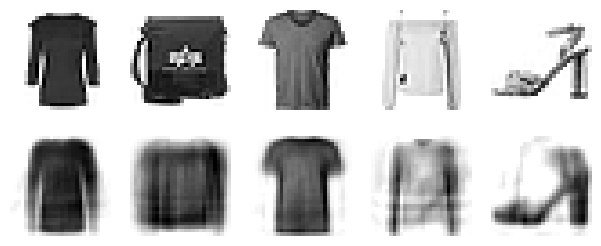

In [90]:
plot_reconstructions(sparse_l1_ae)
plt.show()

In [91]:
kl_divergence = tf.keras.losses.kullback_leibler_divergence

class KLDivergenceRegularizer(tf.keras.regularizers.Regularizer):
    def __init__(self, weight, target):
        self.weight = weight
        self.target = target

    def __call__(self, inputs):
        mean_activities = tf.reduce_mean(inputs, axis=0)
        return self.weight * (
            kl_divergence(self.target, mean_activities) +
            kl_divergence(1. - self.target, 1. - mean_activities))

In [93]:
tf.random.set_seed(42)

kld_reg = KLDivergenceRegularizer(weight=5e-3, target=0.1)
sparse_kl_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(300, activation="sigmoid",
                          activity_regularizer=kld_reg)
])
sparse_kl_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(28 * 28),
    tf.keras.layers.Reshape([28, 28])
])
sparse_kl_ae = tf.keras.Sequential([sparse_kl_encoder, sparse_kl_decoder])

# 모델을 컴파일하고 훈련
sparse_kl_ae.compile(loss="mse", optimizer="nadam")
history = sparse_kl_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0694 - val_loss: 0.0231
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0203 - val_loss: 0.0194
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0159 - val_loss: 0.0169
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0137 - val_loss: 0.0149
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0123 - val_loss: 0.0139
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0114 - val_loss: 0.0128
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0108 - val_loss: 0.0114
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0104 - val_loss: 0.0110
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0100 - val_loss: 0.0106
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0098 - val_loss: 0.0100


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


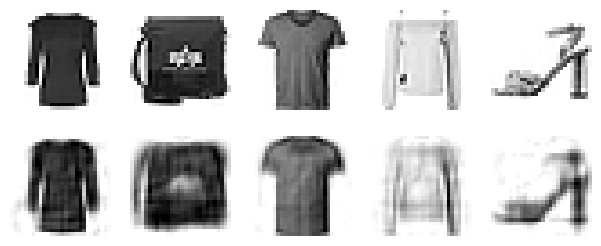

In [94]:
plot_reconstructions(sparse_kl_ae)
plt.show()

In [7]:
class Sampling(tf.keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return tf.random.normal(tf.shape(log_var)) * tf.exp(log_var / 2) + mean

In [8]:
tf.random.set_seed(42)

codings_size = 10

inputs = tf.keras.layers.Input(shape=[28, 28])
Z = tf.keras.layers.Flatten()(inputs)
Z = tf.keras.layers.Dense(150, activation="relu")(Z)
Z = tf.keras.layers.Dense(100, activation="relu")(Z)
codings_mean = tf.keras.layers.Dense(codings_size)(Z)  # μ
codings_log_var = tf.keras.layers.Dense(codings_size)(Z)  # γ
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = tf.keras.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

In [9]:
decoder_inputs = tf.keras.layers.Input(shape=[codings_size])
x = tf.keras.layers.Dense(100, activation="relu")(decoder_inputs)
x = tf.keras.layers.Dense(150, activation="relu")(x)
x = tf.keras.layers.Dense(28 * 28)(x)
outputs = tf.keras.layers.Reshape([28, 28])(x)
variational_decoder = tf.keras.Model(inputs=[decoder_inputs], outputs=[outputs])

In [10]:
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = tf.keras.Model(inputs=[inputs], outputs=[reconstructions])

In [11]:
# 사용자 정의 손실 함수
def vae_loss(inputs, reconstructions):
    reconstruction_loss = tf.reduce_mean(tf.keras.losses.mean_absolute_error(inputs, reconstructions))
    latent_loss = -0.5 * tf.reduce_sum(
        1 + codings_log_var - tf.exp(codings_log_var) - tf.square(codings_mean), axis=-1)
    return reconstruction_loss + tf.reduce_mean(latent_loss) / 784.  # 784는 전체 픽셀 수

In [12]:
# 오토인코더 컴파일 및 훈련
variational_ae.compile(loss='mae', optimizer='nadam')
history = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128,
                             validation_data=(X_valid, X_valid))

Epoch 1/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1510 - val_loss: 0.0936
Epoch 2/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0910 - val_loss: 0.0882
Epoch 3/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0846 - val_loss: 0.0818
Epoch 4/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0810 - val_loss: 0.0802
Epoch 5/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0788 - val_loss: 0.0780
Epoch 6/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0773 - val_loss: 0.0767
Epoch 7/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0759 - val_loss: 0.0754
Epoch 8/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0748 - val_loss: 0.0749
Epoch 9/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0739 - val_loss: 0.0738
Epoch 10/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0730 - val_loss: 0.0735
Epoch 11/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0723 - val_loss: 0.0734
Epoch 12/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

In [125]:
# 변이형 오토인코더 전체 코드
# 샘플링 레이어 정의
class Sampling(tf.keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return tf.random.normal(tf.shape(log_var)) * tf.exp(log_var / 2) + mean

# 설정된 시드
tf.random.set_seed(42)

# 인코더 정의
codings_size = 10

inputs = tf.keras.layers.Input(shape=[28, 28])
Z = tf.keras.layers.Flatten()(inputs)
Z = tf.keras.layers.Dense(150, activation="relu")(Z)
Z = tf.keras.layers.Dense(100, activation="relu")(Z)
codings_mean = tf.keras.layers.Dense(codings_size)(Z)  # μ
codings_log_var = tf.keras.layers.Dense(codings_size)(Z)  # γ
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = tf.keras.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

# 디코더 정의
decoder_inputs = tf.keras.layers.Input(shape=[codings_size])
x = tf.keras.layers.Dense(100, activation="relu")(decoder_inputs)
x = tf.keras.layers.Dense(150, activation="relu")(x)
x = tf.keras.layers.Dense(28 * 28)(x)
outputs = tf.keras.layers.Reshape([28, 28])(x)
variational_decoder = tf.keras.Model(inputs=[decoder_inputs], outputs=[outputs])

# 변량 오토인코더 정의
codings_mean, codings_log_var, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = tf.keras.Model(inputs=[inputs], outputs=[reconstructions])

# 사용자 정의 손실 함수
def vae_loss(inputs, reconstructions):
    reconstruction_loss = tf.reduce_mean(tf.keras.losses.mean_absolute_error(inputs, reconstructions))
    latent_loss = -0.5 * tf.reduce_sum(
        1 + codings_log_var - tf.exp(codings_log_var) - tf.square(codings_mean), axis=-1)
    return reconstruction_loss + tf.reduce_mean(latent_loss) / 784.  # 784는 전체 픽셀 수

# 오토인코더 컴파일 및 훈련
variational_ae.compile(loss='mae', optimizer='nadam')

# 모델 훈련 (에포크 줄임)
history = variational_ae.fit(X_train, X_train, epochs=10, batch_size=128,
                             validation_data=(X_valid, X_valid))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1290 - val_loss: 0.1177
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1164 - val_loss: 0.1103
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1089 - val_loss: 0.1028
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1026 - val_loss: 0.1000
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0997 - val_loss: 0.0981
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0970 - val_loss: 0.0957
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0952 - val_loss: 0.0917
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0917 - val_loss: 0.0906
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0908 - val_loss: 0.0889
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0890 - val_loss: 0.0881


In [13]:
tf.random.set_seed(42)

codings = tf.random.normal(shape=[3 * 7, codings_size])
images = variational_decoder(codings).numpy()

In [16]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = images.squeeze(axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

plot_multiple_images(images, 7)
plt.show()

NameError: name 'images' is not defined

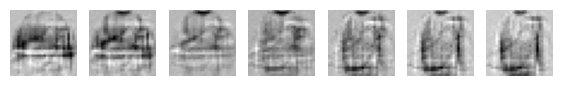

In [15]:
tf.random.set_seed(42)

codings = np.zeros([7, codings_size])
codings[:, 3] = np.linspace(-0.8, 0.8, 7)
images = variational_decoder(codings).numpy()

# 이미지 출력
plot_multiple_images(images)
plt.show()

In [20]:
tf.random.set_seed(42)

codings_size = 30

Dense = tf.keras.layers.Dense
generator = tf.keras.Sequential([
    Dense(100, activation='relu', kernel_initializer='he_normal', input_shape=(codings_size,)),
    Dense(150, activation='relu', kernel_initializer='he_normal'),
    Dense(28 *28, activation='sigmoid'),
    tf.keras.layers.Reshape([28, 28])
])

discriminator = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    Dense(150, activation='relu', kernel_initializer='he_normal'),
    Dense(100, activation='relu', kernel_initializer='he_normal'),
    Dense(1, activation='sigmoid')
])
gan = tf.keras.Sequential([generator, discriminator])

In [22]:
discriminator.compile(loss='binary_crossentropy', optimizer='rmsprop')
discriminator.trainable = False
gan.compile(loss='binary_crossentropy', optimizer='rmsprop')

In [23]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size=1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [26]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        for X_batch in dataset:
            # 단계 1 - 판별자 훈련
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.train_on_batch(X_fake_and_real, y1)
            # 단계 2 - 생성자 훈련
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            gan.train_on_batch(noise, y2)

train_gan(gan, dataset, batch_size, codings_size, n_epochs=5) # 메모리 부족을 피하기 위해 50 > 5

KeyboardInterrupt: 

In [ ]:
tf.random.set_seed(42)

codings = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator.predict(codings)

In [ ]:
plot_multiple_images(generated_images, 8)
plt.show()

In [ ]:
tf.random.set_seed(42)

codings_size = 100
layers = tf.keras.layers

generator = tf.keras.Sequential([
    layers.Dense(7 * 7 * 128), input_shape=(codings_size,)),
    layers.Reshape([7, 7, 128]),
    layers.BatchNormalization(),
    layers.Conv2DTranspose(64, kernel_size=5, strides=2,
                           padding='same', activation='relu'),
    layers.BatchhNormalization(),
    layers.Conv2DTranspose(1, kernel_size=5, strides=2,
                           padding='same', activation='tanh'),
])

discriminator = tf.keras.Sequential([
    layers.Conv2D(64, kernel_size=5, strides=2, padding='same',
                  activation=layers.LeakyReLU(0.2)),
    layers.Dropout(0.4),
    layers.Conv2D(128, kernel_size=5, strides=2, padding='same',
                  activation=layers.LeakyReLU(0.2)),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])
gan = tf.keras.Sequential([generator, discriminator])

In [ ]:
# 판별자와 gan을 컴파일
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [ ]:
X_train_dcgan = X_train.reshape(-1, 28, 28, 1) * 2. - 1. # 크기 변경 및 스케일 조정

In [ ]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train_dcgan)
dataset = dataset.shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)
# 메모리 부족 에러를 피하기 위해 n_epochs를 50에서 10으로 바꿈.
train_gan(gan, dataset, batch_size, codings_size, n_epochs=10)

In [ ]:
tf.random.set_seed(42)
noise = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator.predict(noise)
plot_multiple_images(generated_images, 8)

In [7]:
def variance_schedule(T, s=0.008, max_beta=0.999):
    t = np.arange(T + 1)
    f = np.cos((t / T + s) / (1 + s) * np.pi / 2) ** 2
    alpha = np.clip(f[1:] / f[:-1], 1 - max_beta, 1)
    alpha = np.append(1, alpha).astype(np.float32)  # add α₀ = 1
    beta = 1 - alpha
    alpha_cumprod = np.cumprod(alpha)
    return alpha, alpha_cumprod, beta  # αₜ , α̅ₜ , βₜ for t = 0 to T

np.random.seed(42)
T = 4000
alpha, alpha_cumprod, beta = variance_schedule(T)

In [8]:
def prepare_batch(X):
    X = tf.cast(X[..., tf.newaxis], tf.float32) * 2 - 1
    X_shape = tf.shape(X)
    t = tf.random.uniform([X_shape[0]], minval=1, maxval=T + 1, dtype=tf.int32)
    alpha_cm = tf.gather(alpha_cumprod, t)
    alpha_cm = tf.reshape(alpha_cm, [X_shape[0]] + [1] * (len(X_shape) - 1))
    noise = tf.random.normal(X_shape)
    return {
        'X_noisy': alpha_cm * 0.5 * X + (1 - alpha_cm) ** 0.5 * noise,
        'time': t,
    }, noise

In [9]:
def prepare_dataset(X, batch_size=32, shuffle=False):
    ds = tf.data.Dataset.from_tensor_slices(X)
    if shuffle:
        ds = ds.shuffle(buffer_size=10_000)
    return ds.batch(batch_size).map(prepare_batch).prefetch(1)

tf.random.set_seed(43)
train_set = prepare_dataset(X_train, batch_size=32, shuffle=True)
valid_set = prepare_dataset(X_valid, batch_size=32)

In [12]:
# 사용자 정의 시간 인코딩 층 구현
embed_size = 64

class TimeEncoding(tf.keras.layers.Layer):
    def __init__(self, T, embed_size, dtype=tf.float32, **kwargs):
        super().__init__(dtype=dtype, **kwargs)
        assert embed_size % 2 == 0, "embed_size must be even"
        p, i = np.meshgrid(np.arange(T + 1), 2 * np.arange(embed_size // 2))
        t_emb = np.empty((T + 1, embed_size))
        t_emb[:, ::2] = np.sin(p / 10_000 ** (i / embed_size)).T
        t_emb[:, 1::2] = np.cos(p / 10_000 ** (i / embed_size)).T
        self.time_encodings = tf.constant(t_emb.astype(self.dtype))

    def call(self, inputs):
        return tf.gather(self.time_encodings, inputs)

In [10]:
def build_diffusion_model():
    X_noisy = tf.keras.layers.Input(shape=[28, 28, 1], name="X_noisy")
    time_input = tf.keras.layers.Input(shape=[], dtype=tf.int32, name="time")
    time_enc = TimeEncoding(T, embed_size)(time_input)

    dim = 16
    Z = tf.keras.layers.ZeroPadding2D((3, 3))(X_noisy)
    Z = tf.keras.layers.Conv2D(dim, 3)(Z)
    Z = tf.keras.layers.BatchNormalization()(Z)
    Z = tf.keras.layers.Activation("relu")(Z)

    time = tf.keras.layers.Dense(dim)(time_enc)  # 시간 인코딩 적용
    Z = time[:, tf.newaxis, tf.newaxis, :] + Z  # 모든 픽셀에 시간 데이터 추가

    skip = Z
    cross_skips = []  # UNet의 다운샘플링 & 업샘플링을 가로지르는 스킵 연결

    for dim in (32, 64, 128):
        Z = tf.keras.layers.Activation("relu")(Z)
        Z = tf.keras.layers.SeparableConv2D(dim, 3, padding="same")(Z)
        Z = tf.keras.layers.BatchNormalization()(Z)

        Z = tf.keras.layers.Activation("relu")(Z)
        Z = tf.keras.layers.SeparableConv2D(dim, 3, padding="same")(Z)
        Z = tf.keras.layers.BatchNormalization()(Z)

        cross_skips.append(Z)
        Z = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(Z)
        skip_link = tf.keras.layers.Conv2D(dim, 1, strides=2,
                                           padding="same")(skip)
        Z = tf.keras.layers.add([Z, skip_link])

        time = tf.keras.layers.Dense(dim)(time_enc)
        Z = time[:, tf.newaxis, tf.newaxis, :] + Z
        skip = Z

    for dim in (64, 32, 16):
        Z = tf.keras.layers.Activation("relu")(Z)
        Z = tf.keras.layers.Conv2DTranspose(dim, 3, padding="same")(Z)
        Z = tf.keras.layers.BatchNormalization()(Z)

        Z = tf.keras.layers.Activation("relu")(Z)
        Z = tf.keras.layers.Conv2DTranspose(dim, 3, padding="same")(Z)
        Z = tf.keras.layers.BatchNormalization()(Z)

        Z = tf.keras.layers.UpSampling2D(2)(Z)

        skip_link = tf.keras.layers.UpSampling2D(2)(skip)
        skip_link = tf.keras.layers.Conv2D(dim, 1, padding="same")(skip_link)
        Z = tf.keras.layers.add([Z, skip_link])

        time = tf.keras.layers.Dense(dim)(time_enc)
        Z = time[:, tf.newaxis, tf.newaxis, :] + Z
        Z = tf.keras.layers.concatenate([Z, cross_skips.pop()], axis=-1)
        skip = Z

    outputs = tf.keras.layers.Conv2D(1, 3, padding="same")(Z)[:, 2:-2, 2:-2]
    return tf.keras.Model(inputs=[X_noisy, time_input], outputs=[outputs])

In [14]:
tf.random.set_seed(42) 
model = build_diffusion_model()
model.compile(loss=tf.keras.losses.Huber(), optimizer="nadam")

# 모델 체크포인트 콜백 추가
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_diffusion_model.keras",
                                                   save_best_only=True)

history = model.fit(train_set, validation_data=valid_set, epochs=100,
                    callbacks=[checkpoint_cb])

Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 155s 80ms/step - loss: 0.1453 - val_loss: 0.0475
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 135s 78ms/step - loss: 0.0442 - val_loss: 0.0364
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 131s 76ms/step - loss: 0.0350 - val_loss: 0.0330
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 130s 76ms/step - loss: 0.0308 - val_loss: 0.0316
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 131s 76ms/step - loss: 0.0284 - val_loss: 0.0303
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 133s 77ms/step - loss: 0.0274 - val_loss: 0.0334
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 147s 86ms/step - loss: 0.0266 - val_loss: 0.0273
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 148s 86ms/step - loss: 0.0260 - val_loss: 0.0253
Epoch 9/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 139s 81ms/step - loss: 0.0255 - val_loss: 0.0250
Epoch 10/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 140s 81ms/step - loss: 0.0253 - val_loss: 0.0274
Epoch 11/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 142s 83ms/step - loss: 0.0249 - val

In [15]:
def generate(model, batch_size=32):
    X = tf.random.normal([batch_size, 28, 28, 1])
    for t in range(T, 0, -1):
        noise = (tf.random.normal if t > 1 else tf.zeros)(tf.shape(X))
        X_noise = model({'X_noisy': X, 'time': tf.constant([t] * batch_size)})
        X = (
            1 / alpha[t] ** 0.5
            * (X - beta[t] / (1 - alpha_cumprod[t]) ** 0.5 * X_noise)
            + (1 - alpha[t]) ** 0.5 * noise
        )
    return X

tf.random.set_seed(42)
X_gen = generate(model) # 생성된 이미지

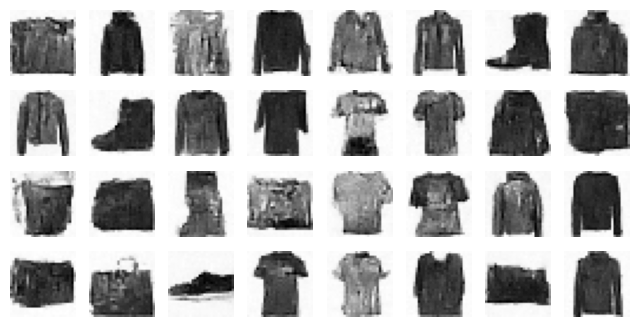

In [17]:
plot_multiple_images(X_gen.numpy(), 8)
plt.show()